In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('problem_1.npy', 'rb') as loadfile:
    example_data = np.load(loadfile, allow_pickle=True) # Data for example below
    problem_data = np.load(loadfile, allow_pickle=True) # Data that you will use for your homework
    
# Both of these data are spike times from a single neuron during stimulus presentation.
# In each data set, there are 1000 trials.
# Each trial is 2 seconds long. Each trial starts at time "0". 
# (We've converted absolute clock time to trial-relative time to make your life easier.)


In [3]:
# Sanity check spike times. If trials are 2 seconds long, then the maximum spiketime we should see is 2.0
max_spike_time = 0.0
for trialdata in example_data: # loop over the trials
    if np.max(trialdata) > max_spike_time:
        max_spike_time = np.max(trialdata)
        
print(max_spike_time)

1.9999758301695625


Text(0.5, 1.0, 'Example Peristimulus Time Histogram')

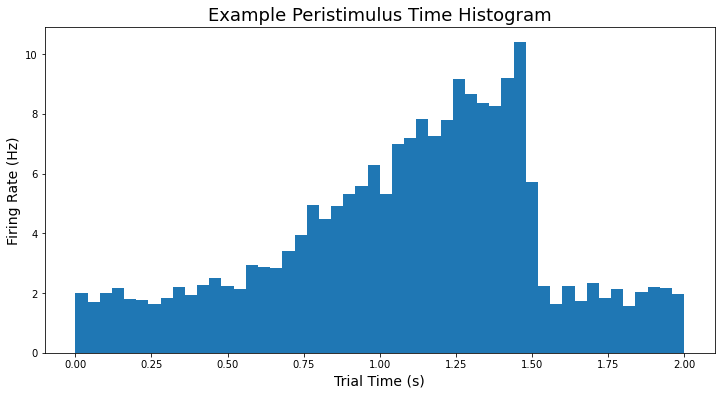

In [4]:
# Calculate a Peri-stimulus time histogram

NumHistBins = 50 # number of time bins in histogram
T = 2.0 # duration of a trial
HistBinBoundaries = np.linspace(0,T,NumHistBins + 1) # There's N+1, because these are the time edges of the bins


PSTH = np.zeros(NumHistBins)
for trial in example_data:
    counts, bin_edges = np.histogram(trial,bins=HistBinBoundaries) # counts will return a NumHistBins vector
    PSTH = PSTH + counts


BinDuration = T/NumHistBins
NormalizedPSTH = PSTH / BinDuration / len(example_data)


# Plot observed event rate in small bins

BinCenters = HistBinBoundaries[:-1] + BinDuration/2 # The center of the bins should be the x-location of each bar
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.bar(BinCenters, NormalizedPSTH, width=BinDuration)
ax.set_ylabel('Firing Rate (Hz)', fontsize=14)
ax.set_xlabel('Trial Time (s)', fontsize=14)
ax.set_title('Example Peristimulus Time Histogram', fontsize=18)

In [5]:
# The Fano Factor is the ratio of [the variance in spike counts] and [the mean of spike counts]
# (where both mean and variance are taken across trials). 

# In general, the Fano Factor for the number of spikes produced by a neuron across trials is
# typically close to 1 if it is firing with the same rate or rate-pattern across trials.
# Thus, the Fano Factor can be a useful way of understanding to what extent an experiment has controlled
# variables that modulate the neuron's firing rate.


Text(0, 0.5, 'Fano Factor')

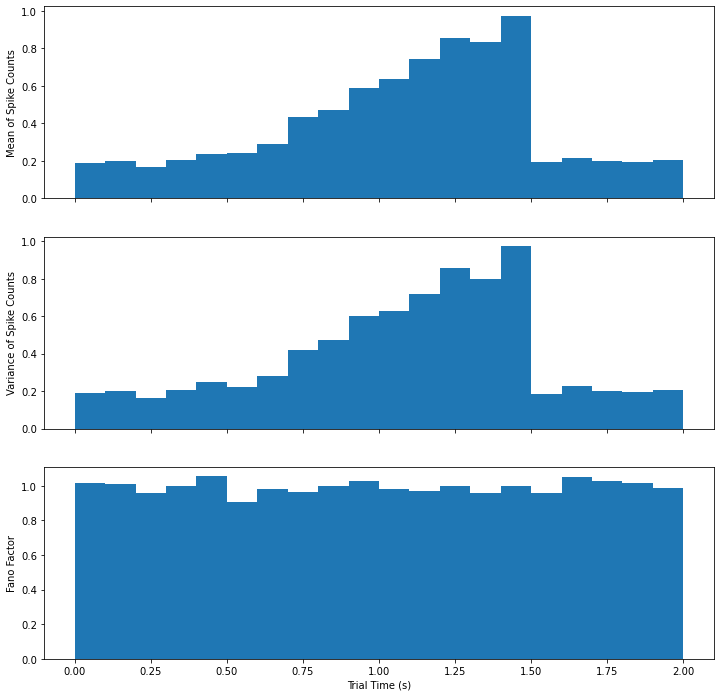

In [6]:


# If we want to calculate a Fano Factor for neurons with a rate-patternThis is related to the PSTH, except
# now we need to construct a big table of binned spike counts across trials.

NumHistBins = 20 # number of time bins in histogram
T = 2.0 # duration of a trial
HistBinBoundaries = np.linspace(0,T,NumHistBins + 1) # There's N+1, because these are the time edges of the bins

TrialCounts = np.zeros((NumHistBins, len(example_data))) # Make a big table of binned spike counts X trials
for index, trial in enumerate(example_data):
    counts, bin_edges = np.histogram(trial,bins=HistBinBoundaries) # counts will return a NumHistBins vector
    TrialCounts[:, index] = counts


# Plot observed event rate in small bins
BinDuration = T/NumHistBins
BinCenters = HistBinBoundaries[:-1] + BinDuration/2 # The center of the bins should be the x-location of each bar
fig, axes = plt.subplots(3,1, figsize=(12,12), sharex=True)
ax1, ax2, ax3 = axes
ax1.bar(BinCenters, np.mean(TrialCounts, axis=1), width=BinDuration)
ax1.set_ylabel('Mean of Spike Counts')
ax3.set_xlabel('Trial Time (s)')
    
ax2.bar(BinCenters, np.var(TrialCounts, axis=1), width=BinDuration)
ax2.set_ylabel('Variance of Spike Counts')
    
ax3.bar(BinCenters, np.var(TrialCounts, axis=1) / np.mean(TrialCounts, axis=1), width=BinDuration)
ax3.set_ylabel('Fano Factor')
    
